<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Pandas for Exploratory Data Analysis

_Author: Kevin Markham (Washington, D.C.)_

---

## Learning Objectives

- Define what Pandas is and how it relates to data science.
- Manipulate Pandas `DataFrames` and `Series`.
- Filter and sort data using Pandas.
- Manipulate `DataFrame` columns.
- Know how to handle null and missing values.

## Lesson Guide

- [What Is Pandas?](#pandas)
- [Reading Files, Selecting Columns, and Summarizing](#reading-files)
    - [Exercise 1](#exercise-one)
    
    
- [Filtering and Sorting](#filtering-and-sorting)
    - [Exercise 2](#exercise-two)
    
    
- [Renaming, Adding, and Removing Columns](#columns)
- [Handling Missing Values](#missing-values)
    - [Exercise 3](#exercise-three)
    
    
- [Split-Apply-Combine](#split-apply-combine)
    - [Exercise 4](#exercise-four)
    
    
- [Selecting Multiple Columns and Filtering Rows](#multiple-columns)
- [Joining (Merging) DataFrames](#joining-dataframes)
- [OPTIONAL: Other Commonly Used Features](#other-features)
- [OPTIONAL: Other Less Used Features of Pandas](#uncommon-features)
- [Summary](#summary)

<a id="pandas"></a>

## What Is Pandas?

- **Objective:** Define what Pandas is and how it relates to data science.

Pandas is a Python library that primarily adds two new datatypes to Python: `DataFrame` and `Series`.

- A `Series` is a sequence of items, where each item has a unique label (called an `index`).
- A `DataFrame` is a table of data. Each row has a unique label (the `row index`), and each column has a unique label (the `column index`).
- Note that each column in a `DataFrame` can be considered a `Series` (`Series` index).

> Behind the scenes, these datatypes use the NumPy ("Numerical Python") library. NumPy primarily adds the `ndarray` (n-dimensional array) datatype to Pandas. An `ndarray` is similar to a Python list — it stores ordered data. However, it differs in three respects:
> - Each element has the same datatype (typically fixed-size, e.g., a 32-bit integer).
> - Elements are stored contiguously (immediately after each other) in memory for fast retrieval.
> - The total size of an `ndarray` is fixed.

> Storing `Series` and `DataFrame` data in `ndarray`s makes Pandas faster and uses less memory than standard Python datatypes. Many libraries (such as scikit-learn) accept `ndarray`s as input rather than Pandas datatypes, so we will frequently convert between them.


### Using Pandas

Pandas is frequently used in data science because it offers a large set of commonly used functions, is relatively fast, and has a large community. Because many data science libraries also use NumPy to manipulate data, you can easily transfer data between libraries (as we will often do in this class!).

Pandas is a large library that typically takes a lot of practice to learn. It heavily overrides Python operators, resulting in odd-looking syntax. For example, given a `DataFrame` called `cars` which contains a column `mpg`, we might want to view all cars with mpg over 35. To do this, we might write: `cars[cars['mpg'] > 35]`. In standard Python, this would most likely give a syntax error. (**Challenge:** Using only built-in datatypes, can you define `cars` and `mpg` to make this expression valid?)

Pandas also highly favors certain patterns of use. For example, looping through a `DataFrame` row by row is highly discouraged. Instead, Pandas favors using **vectorized functions** that operate column by column. (This is because each column is stored separately as an `ndarray`, and NumPy is optimized for operating on `ndarray`s.)

Do not be discouraged if Pandas feels overwhelming. Gradually, as you use it, you will become familiar with which methods to use and the "Pandas way" of thinking about and manipulating data.

### Class Methods and Attributes

Pandas `DataFrame`s are Pandas class objects and therefore come with attributes and methods. To access these, follow the variable name with a dot. For example, given a `DataFrame` called `users`:

```
- users.index       # accesses the `index` attribute -- note there are no parentheses. attributes are not callable
- users.head()      # calls the `head` method (since there are open/closed parentheses)
- users.head(10)    # calls the `head` method with parameter `10`, indicating the first 10 rows. this is the same as:
- users.head(n=10)  # calls the `head` method, setting the named parameter `n` to have a value of `10`.
```

We know that the `head` method accepts one parameter with an optional name of `n` because it is in the documentation for that method. Let's see how to view the documentation next.

### Viewing Documentation

There are a few ways to find more information about a method.

**Method 1:** In Jupyter, you can quickly view documentation for a method by following the method name by a `?`, as follows:

```
users.head?
```

> ```
Signature: users.head(n=5)
Docstring: Returns first n rows
```

Notice that we would normally invoke this method by calling `users.head(5)`. One quirk of IPython is that the `?` symbol must be the last character in the cell. Otherwise, it might not work.

> The `?` is a shortcut for the built-in Python function `help`, which returns the method's docstring. For example:
> ```
help(users.head)
```

**Method 2:** You can also search online for the phrase "`DataFrame head`", since you are calling the method `head` on the `users` object, which happens to be a `DataFrame`. (`type(users) => pandas.DataFrame`)

You can alternatively search online for `pandas head`, but be careful! `DataFrame` and `Series` both have a `head` method, so make sure you view the documentation for the correct one since they might be called differently. You will know you are looking at the correct documentation page because it will say `DataFrame.head` at the top, instead of `Series.head`.

## Pandas

In [5]:
# Load Pandas into Python
import pandas as pd
from matplotlib import pyplot as plt

%matplotlib inline

In [ ]:
# Quick aside - what is a magic function? Let's find out - Today we're going to spend a bit of time learning to use documentation
#try running this

%magic

#### Magic Functions in Jupyter

IPython (the jupyter shell) has a set of predefined ‘magic functions’ that you can call with a command line style syntax. There are two kinds of magics, line-oriented and cell-oriented. Line magics are prefixed with the % character and work much like OS command-line calls: they get as an argument the rest of the line, where arguments are passed without parentheses or quotes. Cell magics are prefixed with a double %%, and they are functions that get as an argument not only the rest of the line, but also the lines below it in a separate argument.

[Learn More](https://ipython.readthedocs.io/en/stable/interactive/magics.html)

<a id="reading-files"></a>
### Reading Files, Selecting Columns, and Summarizing

In [6]:
users = pd.read_table('./data/user.tbl', sep='|')

C:\Users\601113\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: read_table is deprecated, use read_csv instead.
  """Entry point for launching an IPython kernel.


**Examine the users data.**

In [9]:
users                   # Print the first 30 and last 30 rows.

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213
5,6,42,M,executive,98101
6,7,57,M,administrator,91344
7,8,36,M,administrator,05201
8,9,29,M,student,01002
9,10,53,M,lawyer,90703


In [10]:
type(users)             # DataFrame

pandas.core.frame.DataFrame

In [11]:
users.head()            # Print the first five rows.

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


In [12]:
users.head(1)          # Print the first 10 rows.

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711


In [13]:
users.tail()            # Print the last five rows.

,user_id,age,gender,occupation,zip_code
938,939,26,F,student,33319
939,940,32,M,administrator,02215
940,941,20,M,student,97229
941,942,48,F,librarian,78209
942,943,22,M,student,77841


In [14]:
 # The row index (aka "the row labels" — in this case integers)
users.index            

RangeIndex(start=0, stop=943, step=1)

In [15]:
# Column names (which is "an index")
users.columns

Index(['user_id', 'age', 'gender', 'occupation', 'zip_code'], dtype='object')

In [16]:
# Datatypes of each column — each column is stored as an ndarray, which has a datatype
users.dtypes

user_id        int64
age            int64
gender        object
occupation    object
zip_code      object
dtype: object

In [17]:
# Number of rows and columns
users.shape

(943, 5)

In [18]:
# All values as a NumPy array
users.values

array([[1, 24, 'M', 'technician', '85711'],
       [2, 53, 'F', 'other', '94043'],
       [3, 23, 'M', 'writer', '32067'],
       ...,
       [941, 20, 'M', 'student', '97229'],
       [942, 48, 'F', 'librarian', '78209'],
       [943, 22, 'M', 'student', '77841']], dtype=object)

In [19]:
# Concise summary (including memory usage) — useful to quickly see if nulls exist
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 943 entries, 0 to 942
Data columns (total 5 columns):
user_id       943 non-null int64
age           943 non-null int64
gender        943 non-null object
occupation    943 non-null object
zip_code      943 non-null object
dtypes: int64(2), object(3)
memory usage: 36.9+ KB


** Select or index data.**<br>
Pandas `DataFrame`s have structural similarities with Python-style lists and dictionaries.  
In the example below, we select a column of data using the name of the column in a similar manner to how we select a dictionary value with the dictionary key.

In [20]:
# Select a column — returns a Pandas Series (essentially an ndarray with an index)
users['gender']

0      M
1      F
2      M
3      M
4      F
5      M
6      M
7      M
8      M
9      M
10     F
11     F
12     M
13     M
14     F
15     M
16     M
17     F
18     M
19     F
20     M
21     M
22     F
23     F
24     M
25     M
26     F
27     M
28     M
29     M
      ..
913    F
914    M
915    M
916    F
917    M
918    M
919    F
920    F
921    F
922    M
923    M
924    F
925    M
926    M
927    M
928    M
929    F
930    M
931    M
932    M
933    M
934    M
935    M
936    M
937    F
938    F
939    M
940    M
941    F
942    M
Name: gender, Length: 943, dtype: object

In [ ]:
# DataFrame columns are Pandas Series.
type(users['gender'])

In [21]:
# Select one column using the DataFrame attribute.
users.gender

# While a useful shorthand, these attributes only exist
# if the column name has no punctuations or spaces.

0      M
1      F
2      M
3      M
4      F
5      M
6      M
7      M
8      M
9      M
10     F
11     F
12     M
13     M
14     F
15     M
16     M
17     F
18     M
19     F
20     M
21     M
22     F
23     F
24     M
25     M
26     F
27     M
28     M
29     M
      ..
913    F
914    M
915    M
916    F
917    M
918    M
919    F
920    F
921    F
922    M
923    M
924    F
925    M
926    M
927    M
928    M
929    F
930    M
931    M
932    M
933    M
934    M
935    M
936    M
937    F
938    F
939    M
940    M
941    F
942    M
Name: gender, Length: 943, dtype: object

**Summarize (describe) the data.**<br>
Pandas has a bunch of built-in methods to quickly summarize your data and provide you with a quick general understanding.

In [22]:
# Describe all numeric columns.
users.describe()

,user_id,age
count,943.000000,943.000000
mean,472.000000,34.051962
std,272.364951,12.192740
min,1.000000,7.000000
25%,236.500000,25.000000
50%,472.000000,31.000000
75%,707.500000,43.000000
max,943.000000,73.000000


In [26]:
# Describe all object columns (can include multiple types).
users.describe(include=['object'])

,gender,occupation,zip_code
count,943,943,943
unique,2,21,795
top,M,student,55414
freq,670,196,9


In [27]:
# Describe all columns, including non-numeric.
users.describe(include='all')

,user_id,age,gender,occupation,zip_code
count,943.000000,943.000000,943,943,943
unique,NaN,NaN,2,21,795
top,NaN,NaN,M,student,55414
freq,NaN,NaN,670,196,9
mean,472.000000,34.051962,NaN,NaN,NaN
std,272.364951,12.192740,NaN,NaN,NaN
min,1.000000,7.000000,NaN,NaN,NaN
25%,236.500000,25.000000,NaN,NaN,NaN
50%,472.000000,31.000000,NaN,NaN,NaN
75%,707.500000,43.000000,NaN,NaN,NaN


In [28]:
# Describe a single column — recall that "users.gender" refers to a Series.
users.gender.describe()

count     943
unique      2
top         M
freq      670
Name: gender, dtype: object

In [31]:
# Calculate the mean of the ages.
users.age.mean()

34.05196182396607

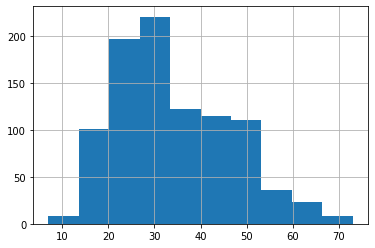

In [32]:
# Draw a histogram of a column (the distribution of ages).
users.age.hist()

**Count the number of occurrences of each value.**

In [33]:
users.occupation.value_counts()     # Most useful for categorical variables

student          196
other            105
educator          95
administrator     79
engineer          67
programmer        66
librarian         51
writer            45
executive         32
scientist         31
artist            28
technician        27
marketing         26
entertainment     18
healthcare        16
retired           14
salesman          12
lawyer            12
none               9
homemaker          7
doctor             7
Name: occupation, dtype: int64

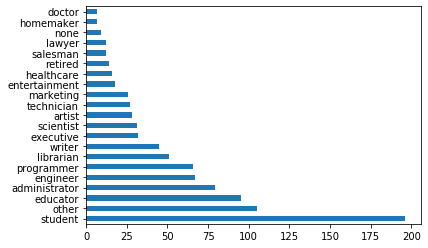

In [34]:
users.occupation.value_counts().plot(kind='barh')     # Quick plot by category

In [35]:
# Can also be used with numeric variables
#   Try .sort_index() to sort by indices or .sort_values() to sort by counts.
users.age.value_counts()

30    39
25    38
22    37
28    36
27    35
26    34
24    33
29    32
20    32
32    28
23    28
35    27
21    27
33    26
31    25
19    23
44    23
39    22
40    21
36    21
42    21
51    20
50    20
48    20
49    19
37    19
18    18
34    17
38    17
45    15
      ..
47    14
43    13
46    12
53    12
55    11
41    10
57     9
60     9
52     6
56     6
15     6
13     5
16     5
54     4
63     3
14     3
65     3
70     3
61     3
59     3
58     3
64     2
68     2
69     2
62     2
11     1
10     1
73     1
66     1
7      1
Name: age, Length: 61, dtype: int64

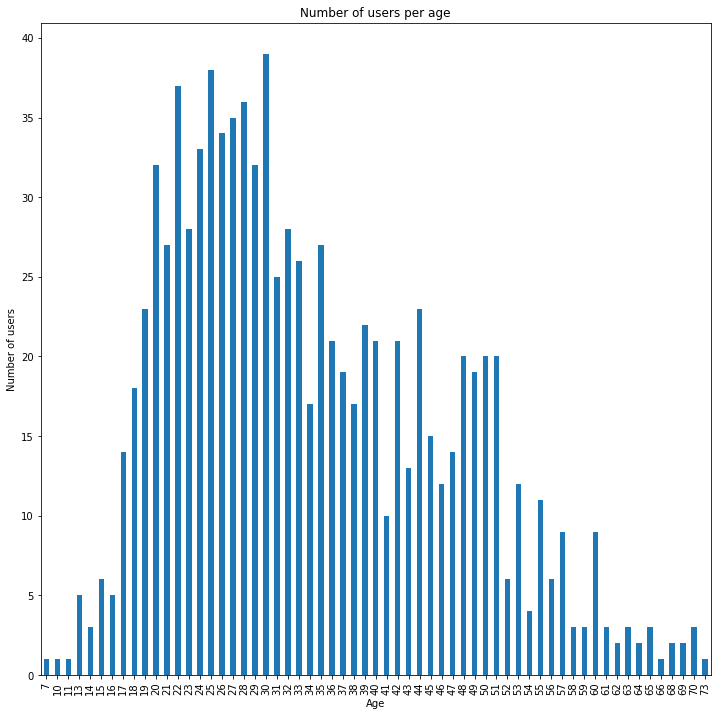

In [36]:
users.age.value_counts().sort_index().plot(kind='bar', figsize=(12,12));     # Bigger plot by increasing age
plt.xlabel('Age');
plt.ylabel('Number of users');
plt.title('Number of users per age');

<a id="exercise-one"></a>
### Exercise 1

In [37]:
# Read drinks.csv into a DataFrame called "drinks".
# Path to csv './data/drinks.csv'

drinks = pd.read_csv('./data/drinks.csv', na_filter=False)

In [41]:
# Print the head and the tail.
drinks.head()


,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF


In [40]:
drinks.tail()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
188,Venezuela,333,100,3,7.7,SA
189,Vietnam,111,2,1,2.0,AS
190,Yemen,6,0,0,0.1,AS
191,Zambia,32,19,4,2.5,AF
192,Zimbabwe,64,18,4,4.7,AF


In [ ]:
# Examine the default index, datatypes, and shape.


In [ ]:
# Print the beer_servings Series.


In [55]:
# Calculate the average beer_servings for the entire data set.
drinks["beer_servings"].mean()

106.16062176165804

In [54]:
# Count the number of occurrences of each "continent" value and see if it looks correct.
drinks["continent"].value_counts()  

AF    53
EU    45
AS    44
NA    23
OC    16
SA    12
Name: continent, dtype: int64

<a id="filtering-and-sorting"></a>
### Filtering and Sorting
- **Objective:** Filter and sort data using Pandas.

We can use simple operator comparisons on columns to extract relevant or drop irrelevant information.

**Logical filtering: Only show users with age < 20.**

In [56]:
# Create a Series of Booleans…
# In Pandas, this comparison is performed element-wise on each row of data.
young_bool = users.age < 20
young_bool

0      False
1      False
2      False
3      False
4      False
5      False
6      False
7      False
8      False
9      False
10     False
11     False
12     False
13     False
14     False
15     False
16     False
17     False
18     False
19     False
20     False
21     False
22     False
23     False
24     False
25     False
26     False
27     False
28     False
29      True
       ...  
913    False
914    False
915    False
916    False
917    False
918    False
919    False
920    False
921    False
922    False
923    False
924     True
925    False
926    False
927    False
928    False
929    False
930    False
931    False
932    False
933    False
934    False
935    False
936    False
937    False
938    False
939    False
940    False
941    False
942    False
Name: age, Length: 943, dtype: bool

In [57]:
# …and use that Series to filter rows.
# In Pandas, indexing a DataFrame by a Series of Booleans only selects rows that are True in the Boolean.
users[young_bool]

,user_id,age,gender,occupation,zip_code
29,30,7,M,student,55436
35,36,19,F,student,93117
51,52,18,F,student,55105
56,57,16,M,none,84010
66,67,17,M,student,60402
67,68,19,M,student,22904
100,101,15,M,student,05146
109,110,19,M,student,77840
141,142,13,M,other,48118
178,179,15,M,entertainment,20755


In [58]:
# Or, combine into a single step.
users[users.age < 20]

,user_id,age,gender,occupation,zip_code
29,30,7,M,student,55436
35,36,19,F,student,93117
51,52,18,F,student,55105
56,57,16,M,none,84010
66,67,17,M,student,60402
67,68,19,M,student,22904
100,101,15,M,student,05146
109,110,19,M,student,77840
141,142,13,M,other,48118
178,179,15,M,entertainment,20755


In [59]:
# Important: This creates a view of the original DataFrame, not a new DataFrame.
# If you alter this view (e.g., by storing it in a variable and altering that)
# You will alter only the slice of the DataFrame and not the actual DataFrame itself
# Here, notice that Pandas gives you a SettingWithCopyWarning to alert you of this.

# It is best practice to use .loc and .iloc instead of the syntax below

users_under20 = users[users.age < 20].copy()   # To resolve this warning, copy the `DataFrame` using `.copy()`.
users_under20['newcolumn'] = 0
users_under20

,user_id,age,gender,occupation,zip_code,newcolumn
29,30,7,M,student,55436,0
35,36,19,F,student,93117,0
51,52,18,F,student,55105,0
56,57,16,M,none,84010,0
66,67,17,M,student,60402,0
67,68,19,M,student,22904,0
100,101,15,M,student,05146,0
109,110,19,M,student,77840,0
141,142,13,M,other,48118,0
178,179,15,M,entertainment,20755,0


In [60]:
# Select one column from the filtered results.
users[users.age < 20].occupation

29           student
35           student
51           student
56              none
66           student
67           student
100          student
109          student
141            other
178    entertainment
205          student
220          student
222          student
245          student
256          student
257          student
261          student
269          student
280          student
288             none
290          student
302          student
319          student
340          student
346          student
366          student
367          student
374    entertainment
392          student
396          student
           ...      
600           artist
608          student
617          student
618          student
619           writer
620          student
623          student
627             none
630          student
631          student
641          student
645          student
673          student
699          student
709          student
728          student
746          

In [61]:
# value_counts of resulting Series
users[users.age < 20].occupation.value_counts()

student          64
other             4
none              3
writer            2
entertainment     2
artist            1
salesman          1
Name: occupation, dtype: int64

**Logical filtering with multiple conditions**

In [62]:
# Ampersand for `AND` condition. (This is a "bitwise" `AND`.)
# Important: You MUST put parentheses around each expression because `&` has a higher precedence than `<`.
users[(users.age < 20) & (users.gender=='M')]

,user_id,age,gender,occupation,zip_code
29,30,7,M,student,55436
56,57,16,M,none,84010
66,67,17,M,student,60402
67,68,19,M,student,22904
100,101,15,M,student,05146
109,110,19,M,student,77840
141,142,13,M,other,48118
178,179,15,M,entertainment,20755
220,221,19,M,student,20685
245,246,19,M,student,28734


In [63]:
# Pipe for `OR` condition. (This is a "bitwise" `OR`.)
# Important: You MUST put parentheses around each expression because `|` has a higher precedence than `<`.
users[(users.age < 20) | (users.age > 60)]

,user_id,age,gender,occupation,zip_code
29,30,7,M,student,55436
35,36,19,F,student,93117
51,52,18,F,student,55105
56,57,16,M,none,84010
66,67,17,M,student,60402
67,68,19,M,student,22904
100,101,15,M,student,05146
105,106,61,M,retired,55125
109,110,19,M,student,77840
141,142,13,M,other,48118


In [64]:
# Preferred alternative to multiple `OR` conditions
user_doclaw = users[users.occupation.isin(['doctor', 'lawyer'])].copy()
user_doclaw['New Column']=0
user_doclaw

,user_id,age,gender,occupation,zip_code,New Column
9,10,53,M,lawyer,90703,0
124,125,30,M,lawyer,22202,0
125,126,28,F,lawyer,20015,0
137,138,46,M,doctor,53211,0
160,161,50,M,lawyer,55104,0
204,205,47,M,lawyer,06371,0
250,251,28,M,doctor,85032,0
298,299,29,M,doctor,63108,0
338,339,35,M,lawyer,37901,0
364,365,29,M,lawyer,20009,0


**Sorting**

In [65]:
# Sort a Series.
users.age.sort_values()

29      7
470    10
288    11
879    13
608    13
141    13
673    13
627    13
812    14
205    14
886    14
848    15
280    15
460    15
617    15
178    15
100    15
56     16
579    16
549    16
450    16
433    16
620    17
618    17
760    17
374    17
903    17
645    17
581    17
256    17
       ..
89     60
307    60
930    60
751    60
468    60
463    60
233    60
693    60
933    61
350    61
105    61
519    62
265    62
857    63
776    63
363    63
844    64
422    64
317    65
650    65
563    65
210    66
348    68
572    68
558    69
584    69
766    70
802    70
859    70
480    73
Name: age, Length: 943, dtype: int64

In [66]:
# Sort a DataFrame by a single column.
users.sort_values('age')

,user_id,age,gender,occupation,zip_code
29,30,7,M,student,55436
470,471,10,M,student,77459
288,289,11,M,none,94619
879,880,13,M,student,83702
608,609,13,F,student,55106
141,142,13,M,other,48118
673,674,13,F,student,55337
627,628,13,M,none,94306
812,813,14,F,student,02136
205,206,14,F,student,53115


In [67]:
# Use descending order instead.
users.sort_values('age', ascending=False)

,user_id,age,gender,occupation,zip_code
480,481,73,M,retired,37771
802,803,70,M,administrator,78212
766,767,70,M,engineer,00000
859,860,70,F,retired,48322
584,585,69,M,librarian,98501
558,559,69,M,executive,10022
348,349,68,M,retired,61455
572,573,68,M,retired,48911
210,211,66,M,salesman,32605
650,651,65,M,retired,02903


In [68]:
# Sort by multiple columns.
users.sort_values(['occupation', 'age'])

,user_id,age,gender,occupation,zip_code
117,118,21,M,administrator,90210
179,180,22,F,administrator,60202
281,282,22,M,administrator,20057
316,317,22,M,administrator,13210
438,439,23,F,administrator,20817
508,509,23,M,administrator,10011
393,394,25,M,administrator,96819
664,665,25,M,administrator,55412
725,726,25,F,administrator,80538
77,78,26,M,administrator,61801


<a id="exercise-two"></a>
### Exercise 2
Use the `drinks.csv` or `drinks` `DataFrame` from earlier to complete the following.

In [69]:
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF


In [70]:
# Filter DataFrame to only include European countries.



In [71]:
# Filter DataFrame to only include European countries with wine_servings > 300.



In [72]:
# Calculate the average beer_servings for all of Europe.



In [73]:
# Determine which 10 countries have the highest total_litres_of_pure_alcohol.


<a id="columns"></a>
### Renaming, Adding, and Removing Columns

- **Objective:** Manipulate `DataFrame` columns.

beer_servings                   1.000000
spirit_servings                 0.458819
wine_servings                   0.527172
total_litres_of_pure_alcohol    0.835839
Name: beer_servings, dtype: float64


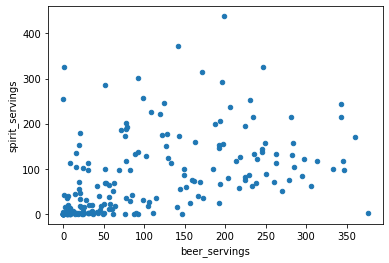

In [74]:
# Are beer servings and spirit servings correlated?
drinks.plot(kind='scatter', x='beer_servings', y='spirit_servings');

print((drinks.corr()['beer_servings']))  # Correlation coefficients

In [75]:
# Rename one or more columns in a single output using value mapping.
drinks.rename(columns={'beer_servings':'beer', 'wine_servings':'wine'})


,country,beer,spirit_servings,wine,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF
5,Antigua & Barbuda,102,128,45,4.9,NA
6,Argentina,193,25,221,8.3,SA
7,Armenia,21,179,11,3.8,EU
8,Australia,261,72,212,10.4,OC
9,Austria,279,75,191,9.7,EU


In [77]:
# Rename one or more columns in the original DataFrame.
drinks.rename(columns={'beer_servings':'beer', 'wine_servings':'wine'}, inplace=True)

In [78]:
drinks.head()

,country,beer,spirit_servings,wine,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF


In [79]:
# Replace all column names using a list of matching length.
drink_cols = ['country', 'beer', 'spirit', 'wine', 'liters', 'continent'] 

# Replace during file reading (disables the header from the file).
drinks = pd.read_csv('data/drinks.csv', header=0, names=drink_cols)

In [80]:
drinks.head()

,country,beer,spirit,wine,liters,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF


In [81]:
# Replace after file has already been read into Python.
drinks.columns = drink_cols

In [82]:
drinks.columns

Index(['country', 'beer', 'spirit', 'wine', 'liters', 'continent'], dtype='object')

**Easy Column Operations**<br>
Rather than having to reference indexes and create for loops to do column-wise operations, Pandas is smart and knows that when we add columns together we want to add the values in each row together.

In [83]:
# Add a new column as a function of existing columns.
drinks['servings'] = drinks.beer + drinks.spirit + drinks.wine
drinks['mL'] = drinks.liters * 1000

drinks.head()

,country,beer,spirit,wine,liters,continent,servings,mL
0,Afghanistan,0,0,0,0.0,AS,0,0.0
1,Albania,89,132,54,4.9,EU,275,4900.0
2,Algeria,25,0,14,0.7,AF,39,700.0
3,Andorra,245,138,312,12.4,EU,695,12400.0
4,Angola,217,57,45,5.9,AF,319,5900.0


**Removing Columns**

In [84]:
# axis=0 for rows, 1 for columns
drinks.drop('mL', axis=1)

,country,beer,spirit,wine,liters,continent,servings
0,Afghanistan,0,0,0,0.0,AS,0
1,Albania,89,132,54,4.9,EU,275
2,Algeria,25,0,14,0.7,AF,39
3,Andorra,245,138,312,12.4,EU,695
4,Angola,217,57,45,5.9,AF,319
5,Antigua & Barbuda,102,128,45,4.9,NaN,275
6,Argentina,193,25,221,8.3,SA,439
7,Armenia,21,179,11,3.8,EU,211
8,Australia,261,72,212,10.4,OC,545
9,Austria,279,75,191,9.7,EU,545


In [85]:
drinks.head()

,country,beer,spirit,wine,liters,continent,servings,mL
0,Afghanistan,0,0,0,0.0,AS,0,0.0
1,Albania,89,132,54,4.9,EU,275,4900.0
2,Algeria,25,0,14,0.7,AF,39,700.0
3,Andorra,245,138,312,12.4,EU,695,12400.0
4,Angola,217,57,45,5.9,AF,319,5900.0


In [86]:
# Drop multiple columns.
drinks.drop(['mL', 'servings'], axis=1)

,country,beer,spirit,wine,liters,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF
5,Antigua & Barbuda,102,128,45,4.9,NaN
6,Argentina,193,25,221,8.3,SA
7,Armenia,21,179,11,3.8,EU
8,Australia,261,72,212,10.4,OC
9,Austria,279,75,191,9.7,EU


In [87]:
# Drop on the original DataFrame rather than returning a new one.
drinks.drop(['mL', 'servings'], axis=1, inplace=True)

In [88]:
drinks.head()

,country,beer,spirit,wine,liters,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF


<a id="missing-values"></a>
### Handling Missing Values

- **Objective:** Know how to handle null and missing values.

Sometimes, values will be missing from the source data or as a byproduct of manipulations. It is very important to detect missing data. Missing data can:

- Make the entire row ineligible to be training data for a model.
- Hint at data-collection errors.
- Indicate improper conversion or manipulation.
- Actually not be missing — it sometimes means "zero," "false," "not applicable," or "entered an empty string."

For example, a `.csv` file might have a missing value in some data fields:

```
tool_name,material,cost
hammer,wood,8
chainsaw,,
wrench,metal,5
```

When this data is imported, "null" values will be stored in the second row (in the "material" and "cost" columns).

> In Pandas, a "null" value is either `None` or `np.NaN` (Not a Number). Many fixed-size numeric datatypes (such as integers) do not have a way of representing `np.NaN`. So, numeric columns will be promoted to floating-point datatypes that do support it. For example, when importing the `.csv` file above:

> - **For the second row:** `None` will be stored in the "material" column and `np.NaN` will be stored in the "cost" column. The entire "cost" column (stored as a single `ndarray`) must be stored as floating-point values to accommodate the `np.NaN`, even though an integer `8` is in the first row.

In [90]:
# Missing values are usually excluded in calculations by default.
drinks.continent.value_counts()              # Excludes missing values in the calculation

AF    53
EU    45
AS    44
OC    16
SA    12
Name: continent, dtype: int64

In [91]:
# Includes missing values
drinks.continent.value_counts(dropna=False)

AF     53
EU     45
AS     44
NaN    23
OC     16
SA     12
Name: continent, dtype: int64

In [92]:
# Find missing values in a Series.
# True if missing, False if not missing
drinks.continent.isnull()

0      False
1      False
2      False
3      False
4      False
5       True
6      False
7      False
8      False
9      False
10     False
11      True
12     False
13     False
14      True
15     False
16     False
17      True
18     False
19     False
20     False
21     False
22     False
23     False
24     False
25     False
26     False
27     False
28     False
29     False
       ...  
163    False
164    False
165    False
166    False
167    False
168    False
169    False
170    False
171    False
172    False
173    False
174     True
175    False
176    False
177    False
178    False
179    False
180    False
181    False
182    False
183    False
184     True
185    False
186    False
187    False
188    False
189    False
190    False
191    False
192    False
Name: continent, Length: 193, dtype: bool

In [93]:
# Count the missing values — sum() works because True is 1 and False is 0.
drinks.continent.isnull().sum()

23

In [94]:
# True if not missing, False if missing
drinks.continent.notnull()

0       True
1       True
2       True
3       True
4       True
5      False
6       True
7       True
8       True
9       True
10      True
11     False
12      True
13      True
14     False
15      True
16      True
17     False
18      True
19      True
20      True
21      True
22      True
23      True
24      True
25      True
26      True
27      True
28      True
29      True
       ...  
163     True
164     True
165     True
166     True
167     True
168     True
169     True
170     True
171     True
172     True
173     True
174    False
175     True
176     True
177     True
178     True
179     True
180     True
181     True
182     True
183     True
184    False
185     True
186     True
187     True
188     True
189     True
190     True
191     True
192     True
Name: continent, Length: 193, dtype: bool

In [95]:
# Only show rows where continent is not missing.
drinks[drinks.continent.isnull()]

,country,beer,spirit,wine,liters,continent
5,Antigua & Barbuda,102,128,45,4.9,NaN
11,Bahamas,122,176,51,6.3,NaN
14,Barbados,143,173,36,6.3,NaN
17,Belize,263,114,8,6.8,NaN
32,Canada,240,122,100,8.2,NaN
41,Costa Rica,149,87,11,4.4,NaN
43,Cuba,93,137,5,4.2,NaN
50,Dominica,52,286,26,6.6,NaN
51,Dominican Republic,193,147,9,6.2,NaN
54,El Salvador,52,69,2,2.2,NaN


**Understanding Pandas Axis**

In [96]:
# Sums "down" the 0 axis (rows) — so, we get the sums of each column
drinks.sum(axis=0)

country    AfghanistanAlbaniaAlgeriaAndorraAngolaAntigua ...
beer                                                   20489
spirit                                                 15632
wine                                                    9544
liters                                                 910.4
dtype: object

In [97]:
# axis=0 is the default.
drinks.sum()

country    AfghanistanAlbaniaAlgeriaAndorraAngolaAntigua ...
beer                                                   20489
spirit                                                 15632
wine                                                    9544
liters                                                 910.4
dtype: object

In [98]:
# Sums "across" the 1 axis (columns) — so, we get the sums of numeric values in the row (beer+spirit+wine+liters+…)
drinks.sum(axis=1)

0        0.0
1      279.9
2       39.7
3      707.4
4      324.9
5      279.9
6      447.3
7      214.8
8      555.4
9      554.7
10      73.3
11     355.3
12     114.0
13       0.0
14     358.3
15     571.4
16     601.5
17     391.8
18      52.1
19      23.4
20     219.8
21     261.6
22     248.4
23     413.2
24      34.6
25     587.3
26      43.3
27      94.3
28      49.0
29     220.0
       ...  
163    318.6
164     98.7
165    405.2
166    575.2
167     57.0
168     17.3
169    364.4
170    222.9
171      6.1
172     58.3
173     63.1
174    366.4
175     75.3
176     81.4
177    124.2
178     57.0
179     62.3
180    496.9
181    158.8
182    550.4
183     48.7
184    499.7
185    376.6
186    136.4
187     50.9
188    443.7
189    116.0
190      6.1
191     57.5
192     90.7
Length: 193, dtype: float64

In [ ]:
drinks.dtypes

**Find missing values in a `DataFrame`.**

In [99]:
# DataFrame of Booleans
drinks.isnull()

,country,beer,spirit,wine,liters,continent
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
5,False,False,False,False,False,True
6,False,False,False,False,False,False
7,False,False,False,False,False,False
8,False,False,False,False,False,False
9,False,False,False,False,False,False


country       0
beer          0
spirit        0
wine          0
liters        0
continent    23
dtype: int64


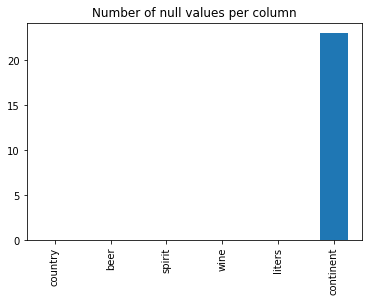

In [100]:
# Count the missing values in each column — remember by default, axis=0.
print((drinks.isnull().sum()))

drinks.isnull().sum().plot(kind='bar');         # visually
plt.title('Number of null values per column');

**Dropping Missing Values**

In [101]:
# Drop a row if ANY values are missing from any column — can be dangerous!
drinks.dropna()

,country,beer,spirit,wine,liters,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF
6,Argentina,193,25,221,8.3,SA
7,Armenia,21,179,11,3.8,EU
8,Australia,261,72,212,10.4,OC
9,Austria,279,75,191,9.7,EU
10,Azerbaijan,21,46,5,1.3,EU


In [108]:
# Drop a row only if ALL values are missing.
drinks.dropna(how='all')

,country,beer,spirit,wine,liters,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF
5,Antigua & Barbuda,102,128,45,4.9,NA
6,Argentina,193,25,221,8.3,SA
7,Armenia,21,179,11,3.8,EU
8,Australia,261,72,212,10.4,OC
9,Austria,279,75,191,9.7,EU


**Filling Missing Values**<br>
You may have noticed that the continent North America (NA) does not appear in the `continent` column. Pandas read in the original data and saw "NA", thought it was a missing value, and converted it to a `NaN`, missing value.

In [103]:
# Fill in missing values with "NA" — this is dangerous to do without manually verifying them!
drinks.continent.fillna(value='NA')

0      AS
1      EU
2      AF
3      EU
4      AF
5      NA
6      SA
7      EU
8      OC
9      EU
10     EU
11     NA
12     AS
13     AS
14     NA
15     EU
16     EU
17     NA
18     AF
19     AS
20     SA
21     EU
22     AF
23     SA
24     AS
25     EU
26     AF
27     AF
28     AF
29     AF
       ..
163    SA
164    AF
165    EU
166    EU
167    AS
168    AS
169    AS
170    EU
171    AS
172    AF
173    OC
174    NA
175    AF
176    AS
177    AS
178    OC
179    AF
180    EU
181    AS
182    EU
183    AF
184    NA
185    SA
186    AS
187    OC
188    SA
189    AS
190    AS
191    AF
192    AF
Name: continent, Length: 193, dtype: object

In [104]:
# Modifies "drinks" in-place
drinks.continent.fillna(value='NA', inplace=True)

In [105]:
drinks

,country,beer,spirit,wine,liters,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF
5,Antigua & Barbuda,102,128,45,4.9,NA
6,Argentina,193,25,221,8.3,SA
7,Armenia,21,179,11,3.8,EU
8,Australia,261,72,212,10.4,OC
9,Austria,279,75,191,9.7,EU


In [106]:
# Turn off the missing value filter — this is a better approach!
drinks = pd.read_csv('./data/drinks.csv', header=0, names=drink_cols, na_filter=False)

<a id="exercise-three"></a>
### Exercise 3

In [107]:
# Read ufo.csv into a DataFrame called "ufo".
ufo_data = './data/ufo.csv'
ufo = pd.read_csv(ufo_data)


In [ ]:
# Check the shape of the DataFrame.


In [ ]:
# What are the three most common colors reported?


In [ ]:
# Rename any columns with spaces so that they don't contain spaces.



In [ ]:
#Checking your work is a great step


In [ ]:
# For reports in VA, what's the most common city?


In [ ]:
# Print a DataFrame containing only reports from Arlington, VA.


In [ ]:
# Count the number of missing values in each column.


In [ ]:
# How many rows remain if you drop all rows with any missing values?


In [ ]:
# How many rows did we lose by removing all rows with any missing values?


<a id="split-apply-combine"></a>
### Split-Apply-Combine

Split-apply-combine is a pattern for analyzing data. Suppose we want to find mean beer consumption per country. Then:

- **Split:** We group data by continent.
- **Apply:** For each group, we apply the `mean()` function to find the average beer consumption.
- **Combine:** We now combine the continent names with the `mean()`s to produce a summary of our findings.

In [113]:
# For each continent, calculate the mean beer servings.
drinks.groupby('continent').beer.mean()

In [ ]:
# For each continent, calculate the mean of all numeric columns.
drinks.groupby('continent').mean()

In [ ]:
# For each continent, describe beer servings.
drinks.groupby(['continent','country']).beer.describe()

In [ ]:
# Similar, but outputs a DataFrame and can be customized — "agg" allows you to aggregate results of Series functions
#drinks.groupby('continent').beer.agg(['count', 'mean', 'min', 'max'])
drinks.groupby('continent').beer.agg(['count', 'mean', 'min', 'max']).sort_values('mean')

In [ ]:
# For each continent, describe all numeric columns.
drinks.groupby('continent').describe()

In [ ]:
# For each continent, count the number of rows.
print((drinks.groupby('continent').continent.count()))
print((drinks.continent.value_counts()))   # should be the same

<a id="exercise-four"></a>
### Exercise 4

Use the "users" `DataFrame` or "users" file in the Data folder to complete the following.

In [ ]:
users.head(1)

In [117]:
# For each occupation in "users", count the number of occurrences.
users.occupation.value_counts()

student          196
other            105
educator          95
administrator     79
engineer          67
programmer        66
librarian         51
writer            45
executive         32
scientist         31
artist            28
technician        27
marketing         26
entertainment     18
healthcare        16
retired           14
salesman          12
lawyer            12
none               9
homemaker          7
doctor             7
Name: occupation, dtype: int64

In [120]:
# For each occupation, calculate the mean age.
users.groupby('occupation').age.mean()

occupation
administrator    38.746835
artist           31.392857
doctor           43.571429
educator         42.010526
engineer         36.388060
entertainment    29.222222
executive        38.718750
healthcare       41.562500
homemaker        32.571429
lawyer           36.750000
librarian        40.000000
marketing        37.615385
none             26.555556
other            34.523810
programmer       33.121212
retired          63.071429
salesman         35.666667
scientist        35.548387
student          22.081633
technician       33.148148
writer           36.311111
Name: age, dtype: float64

In [122]:
# For each occupation, calculate the minimum and maximum ages.
users.groupby('occupation').age.agg(['min', 'max']).sort_values('min')

,min,max
occupation,,
student,7,42
none,11,55
other,13,64
entertainment,15,50
writer,18,60
salesman,18,66
artist,19,48
programmer,20,63
homemaker,20,50


In [123]:
# For each combination of occupation and gender, calculate the mean age.
users.groupby(['occupation','gender']).age.mean()


occupation     gender
administrator  F         40.638889
               M         37.162791
artist         F         30.307692
               M         32.333333
doctor         M         43.571429
educator       F         39.115385
               M         43.101449
engineer       F         29.500000
               M         36.600000
entertainment  F         31.000000
               M         29.000000
executive      F         44.000000
               M         38.172414
healthcare     F         39.818182
               M         45.400000
homemaker      F         34.166667
               M         23.000000
lawyer         F         39.500000
               M         36.200000
librarian      F         40.000000
               M         40.000000
marketing      F         37.200000
               M         37.875000
none           F         36.500000
               M         18.600000
other          F         35.472222
               M         34.028986
programmer     F         32.16666

----

<a id="multiple-columns"></a>
### Selecting Multiple Columns and Filtering Rows

In [ ]:
# Select multiple columns — yet another overload of the DataFrame indexing operator!
my_cols = ['City', 'State']     # Create a list of column names...
ufo[my_cols]                    # ...and use that list to select columns.

In [ ]:
ufo[['City', 'State']].head(1)

In [ ]:
# Or, combine into a single step (this is a Python list inside of the Python index operator!).
ufo[['City', 'State']]

**Use `loc` to select columns by name.**

In [ ]:
# "loc" locates the values from the first parameter (colon means "all rows"), and the column "City".
ufo.loc[:, 'City']

In [ ]:
# Select two columns.
ufo.loc[:, ['City', 'State']]

In [ ]:
ufo.columns

In [ ]:
# Select a range of columns — unlike Python ranges, Pandas index ranges INCLUDE the final column in the range.
ufo.loc[:, 'City':'State']

In [ ]:
# "loc" can also filter rows by "name" (the index).
# Row 0, all columns
ufo.loc[0, :]

In [ ]:
# Rows 0/1/2, all columns
ufo.loc[0:2, :]

In [ ]:
# Rows 0/1/2, range of columns
ufo.loc[0:2, 'City':'State'] 

In [ ]:
# Use "iloc" to filter rows and select columns by integer position.
# (Remember that rows/columns use indices, so "iloc" lets you refer to indices via their index rather than value!)
# All rows, columns in position 0/3 (City/State)
ufo.iloc[:, [0, 3]]

In [ ]:
# All rows, columns in position 0/1/2/3
# Note here it is NOT INCLUDING 4 because this is an integer range, not a Pandas index range!
ufo.iloc[:, 0:4]

In [ ]:
# Rows in position 0/1/2, all columns
ufo.iloc[0:3, :] 

<a id="joining-dataframes"></a>
### Joining (Merging) `DataFrames`

In [ ]:
#import pandas as pd
movie_cols = ['movie_id', 'title']
movies_filename = './data/movies.tbl'

movies = pd.read_table(movies_filename, sep='|', header=None, names=movie_cols, usecols=[0, 1], encoding='latin1')
movies.head()

In [ ]:
rating_cols = ['user_id', 'movie_id', 'rating', 'timestamp']
ratings_filename = './data/movie_ratings.tsv'

ratings = pd.read_table(ratings_filename, sep='\t', header=None, names=rating_cols)
ratings.head()

In [ ]:
# Merge "movies" and "ratings" (inner join on "movie_id").
movie_ratings = pd.merge(movies, ratings)
movie_ratings.head()

In [ ]:
print(movies.shape)
print(ratings.shape)
print(movie_ratings.shape)

<a id="other-features"></a>
### OPTIONAL: Other Commonly Used Features

In [ ]:
# Apply an arbitrary function to each value of a Pandas column, storing the result in a new column.
users['under30'] = users.age.apply(lambda age: age < 30)
users.head()

In [ ]:
# Apply an arbitrary function to each row of a DataFrame, storing the result in a new column.
#  (Remember that, by default, axis=0. Since we want to go row by row, we set axis=1.)

users['under30male'] = users.apply(lambda row: row.age < 30 and row.gender == 'M', axis=1)

In [ ]:
# Map existing values to a different set of values.
users['is_male'] = users.gender.map({'F':0, 'M':1})

In [ ]:
users.head()

In [ ]:
# Replace all instances of a value in a column (must match entire value).
ufo.State.replace('Fl', 'FL', inplace=True)

In [ ]:
# String methods are accessed via "str".
ufo.State.str.upper()                               # Converts to upper case
# checks for a substring
ufo['Colors'].str.contains('RED', na='False') 

In [ ]:
ufo['Time'] = pd.to_datetime(ufo.Time)
ufo.dtypes

In [ ]:
# Convert a string to the datetime format (this is often slow — consider doing it in the "read_csv()" method.)
ufo['Time'] = pd.to_datetime(ufo.Time)
ufo.Time.dt.hour                        # Datetime format exposes convenient attributes
(ufo.Time.max() - ufo.Time.min()).days  # Also allows you to do datetime "math"

In [ ]:
# Set and then remove an index.
ufo.set_index('Time', inplace=True)


In [ ]:
ufo.index

In [ ]:
# Change the datatype of a column.
drinks['beer'] = drinks.beer.astype('float')

In [ ]:
# Create dummy variables for "continent" and exclude first dummy column.
continent_dummies = pd.get_dummies(drinks.continent, prefix='cont').iloc[:, 1:]
continent_dummies.head()

In [ ]:
# Concatenate two DataFrames (axis=0 for rows, axis=1 for columns).
drinks = pd.concat([drinks, continent_dummies], axis=1)

<a id="uncommon-features"></a>
### OPTIONAL: Other Less-Used Features of Pandas

In [ ]:
# Detecting duplicate rows
users.duplicated()          # True if a row is identical to a previous row
users.duplicated().sum()    # Count of duplicates
users[users.duplicated()]   # Only show duplicates
users.drop_duplicates()     # Drop duplicate rows
users.age.duplicated()      # Check a single column for duplicates
users.duplicated(['age', 'gender', 'zip_code']).sum()   # Specify columns for finding duplicates

In [ ]:
# Convert a range of values into descriptive groups.
drinks['beer_level'] = 'low'    # Initially set all values to "low"
drinks.loc[drinks.beer.between(101, 200), 'beer_level'] = 'med'     # Change 101-200 to "med"
drinks.loc[drinks.beer.between(201, 400), 'beer_level'] = 'high'    # Change 201-400 to "high"

In [ ]:
# Display a cross-tabulation of two Series.
pd.crosstab(drinks.continent, drinks.beer_level)

In [ ]:
# Convert "beer_level" into the "category" datatype.
drinks['beer_level'] = pd.Categorical(drinks.beer_level, categories=['low', 'med', 'high'])
drinks.sort_values('beer_level')   # Sorts by the categorical ordering (low to high)

In [ ]:
# Limit which rows are read when reading in a file — useful for large files!
pd.read_csv('./data/drinks.csv', nrows=10)           # Only read first 10 rows
pd.read_csv('./data/drinks.csv', skiprows=[1, 2])    # Skip the first two rows of data

In [ ]:
# Write a DataFrame out to a .csv
drinks.to_csv('drinks_updated.csv')                 # Index is used as first column
drinks.to_csv('drinks_updated.csv', index=False)    # Ignore index

In [ ]:
# Create a DataFrame from a dictionary.
pd.DataFrame({'capital':['Montgomery', 'Juneau', 'Phoenix'], 'state':['AL', 'AK', 'AZ']})

In [ ]:
# Create a DataFrame from a list of lists.
pd.DataFrame([['Montgomery', 'AL'], ['Juneau', 'AK'], ['Phoenix', 'AZ']], columns=['capital', 'state'])

In [ ]:
# Randomly sample a DataFrame.
import NumPy as np
mask = np.random.rand(len(drinks)) < 0.66   # Create a Series of Booleans
train = drinks[mask]                        # Will contain around 66% of the rows
test = drinks[~mask]                        # Will contain the remaining rows

In [ ]:
# Change the maximum number of rows and columns printed ('None' means unlimited).
pd.set_option('max_rows', None)     # Default is 60 rows
pd.set_option('max_columns', None)  # Default is 20 columns
print(drinks)

In [ ]:
# Reset options to defaults.
pd.reset_option('max_rows')
pd.reset_option('max_columns')

In [ ]:
# Change the options temporarily (settings are restored when you exit the "with" block).
with pd.option_context('max_rows', None, 'max_columns', None):
    print(drinks)

<a id="summary"></a>
### Summary

Believe it or not, we've only barely touched the surface of everything that Pandas offers. Don't worry if you don't remember most of it — for now, just knowing what exists is key. Remember that the more you use Pandas to manipulate data, the more of these functions you will take interest in, look up, and remember.

In this notebook, the most important things to familiarize yourself with are the basics:
- Manipulating `DataFrames` and `Series`
- Filtering columns and rows
- Handling missing values
- Split-apply-combine (this one takes some practice!)